In [1]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos el dataset
data = pd.read_csv('data.csv')

# Establecemos el ID_Vuelo como indice
data.set_index('ID_Vuelo', inplace=True)

### Plantemos el modelo de ML

In [2]:
# Establecemos la variable dependiente: 'bool' y la independiente: ('temperatura','cobertura_nubes')

y = data['bool']
X = data[['temperatura','cobertura_nubes']]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [4]:
from sklearn.preprocessing import StandardScaler

escalar = StandardScaler() 
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = lr.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print('La matriz de confusión es: \n', matrix)

La matriz de confusión es: 
 [[4064 1802]
 [1259 4553]]


In [8]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('La exactitud es: \n', accuracy)

La exactitud es: 
 0.7378831991779414


In [9]:
# # El coeficiente de la regresión logística
# print('Coeficiente: \n', lr.coef_)
# # El término independiente de la regresión logística
# print('Término independiente: \n', lr.intercept_) 

# obtenemos los coeficientes de la regresión logística

a0 = lr.intercept_[0]
b1 = lr.coef_[0][0]
b2 = lr.coef_[0][1]

print('a0 = ', a0)
print('b1 = ', b1)
print('b2 = ', b2)


a0 =  -0.14352485325618422
b1 =  0.2304432334511419
b2 =  -1.2707013882031533


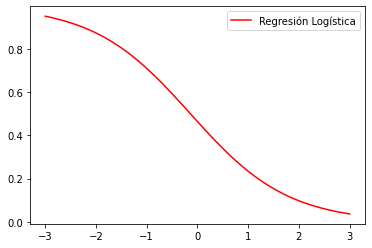

In [10]:
# Graficamos la funcion de regresion logistica 
X = np.linspace(-3, 3, 100)
Y = 1 / (1 + np.exp(-(a0 + b1*X + b2*X)))
plt.plot(X, Y, color='red', label='Regresión Logística')
plt.legend()
plt.show()


In [26]:
x1 = 30
n = 26
x2 = (n*10)/100
y = 1 / (1 + np.exp(-(a0 + b1*x1 + b2*x2)))
print('La probabilidad de que el vuelo se retrase es: ', y)

La probabilidad de que el vuelo se retrase es:  0.9697032173932525
